# Machine Learning on FIFA 2021

* Data exploration on the video game FIFA 2021 and player classification through supervised machine-learning.

In [67]:
# Loading Liabraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt    
import warnings
warnings.filterwarnings('ignore')  # to ignore warnings of dataset

# Reading the dataset
df= pd.read_csv("players_21.csv")
df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


## Exploratory Data Analysis (EDA)

In [68]:
# Checking the shape of dataset
df.shape

(18944, 106)

In [69]:
# Dropping unnecessary Columns
df= df.drop(["sofifa_id","player_url","short_name"],axis=1)


In [70]:
# chcking the types of features with help of .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 103 entries, long_name to rb
dtypes: float64(18), int64(43), object(42)
memory usage: 14.9+ MB


In [71]:
# Statistical Description of Numerical Features
df.describe()


,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,18944.000000,18719.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,18944.000000,...,18944.000000,18944.000000,0.0,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,25.225823,181.190773,75.016892,1.357070,65.677787,71.086729,2.224813e+06,8675.852513,1.091850,2.936603,...,48.050412,57.978674,NaN,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,4.697354,6.825672,7.057140,0.739327,7.002278,6.109985,5.102486e+06,19654.774894,0.361841,0.667132,...,15.671721,12.118390,NaN,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,16.000000,155.000000,50.000000,1.000000,47.000000,47.000000,0.000000e+00,0.000000,1.000000,1.000000,...,6.000000,12.000000,NaN,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,176.000000,70.000000,1.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,...,38.750000,50.000000,NaN,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,181.000000,75.000000,1.000000,66.000000,71.000000,6.500000e+05,3000.000000,1.000000,3.000000,...,49.000000,59.000000,NaN,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,186.000000,80.000000,1.000000,70.000000,75.000000,1.800000e+06,7000.000000,1.000000,3.000000,...,60.000000,66.000000,NaN,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,53.000000,206.000000,110.000000,4.000000,93.000000,95.000000,1.055000e+08,560000.000000,5.000000,5.000000,...,92.000000,96.000000,NaN,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000


### Selecting the most expensive and highly paid player from the dataset

In [72]:
most_exp= df[df["value_eur"]== df["value_eur"].max()]["long_name"]

print("The most expensive player is:",most_exp.values[0])

The most expensive player is: Kylian Mbappé Lottin


In [73]:
highest_wage= df[df["wage_eur"]== df["wage_eur"].max()]["long_name"]

print("The player with the highest wage is:",highest_wage.values[0])

The player with the highest wage is: Lionel Andrés Messi Cuccittini


###  Getting an idea about the Clubs which has the most valuable players and which pay the highest wages on an average

In [74]:
print("Total number of unique Clubs:",df["club_name"].nunique())

Total number of unique Clubs: 681


In [75]:
# Grouping the Clubs and calculating the average value_eur of the players
club_avg_value= pd.DataFrame(df.groupby("club_name")["value_eur"].mean())

club_avg_value= club_avg_value.sort_values(by="value_eur",ascending= False)
club_avg_value.reset_index(inplace= True)

In [76]:
top_10_avg_val= club_avg_value[0:10]
top_10_avg_val

,club_name,value_eur
0,FC Bayern München,2.771364e+07
1,Liverpool,2.547348e+07
2,Real Madrid,2.377656e+07
3,Manchester City,2.264470e+07
4,FC Barcelona,2.188485e+07
5,Paris Saint-Germain,2.088534e+07
6,Chelsea,1.825076e+07
7,Atlético Madrid,1.765152e+07
8,Tottenham Hotspur,1.731894e+07
9,Manchester United,1.709485e+07


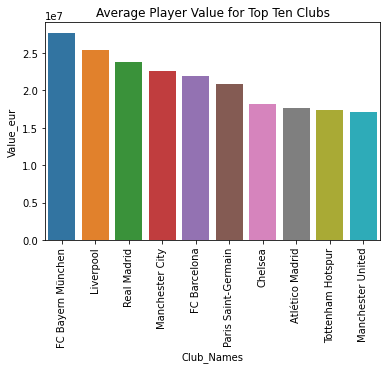

In [77]:
# Plotting the bar chart for the same
sns.barplot(top_10_avg_val["club_name"],top_10_avg_val["value_eur"])
plt.xticks(rotation=90)
plt.ylabel("Value_eur")
plt.xlabel("Club_Names")
plt.title("Average Player Value for Top Ten Clubs")
plt.show()

#### Observation:

* From above table and graph we can observe that "FC Bayern München" Club has the highest Player value of 27.7 million euros   on an average.

In [78]:
# Grouping the Clubs and calculating the average wage_eur of the players
club_avg_wage= pd.DataFrame(df.groupby("club_name")["wage_eur"].mean())

club_avg_wage= club_avg_wage.sort_values(by="wage_eur",ascending= False)
club_avg_wage.reset_index(inplace= True)

In [79]:
top_10_avg_wage= club_avg_wage[0:10]
top_10_avg_wage

,club_name,wage_eur
0,Real Madrid,151500.000000
1,FC Barcelona,143575.757576
2,Manchester City,114090.909091
3,Liverpool,95575.757576
4,Manchester United,89393.939394
5,Inter,84121.212121
6,FC Bayern München,81909.090909
7,Chelsea,81757.575758
8,Tottenham Hotspur,77030.303030
9,Paris Saint-Germain,73294.827586


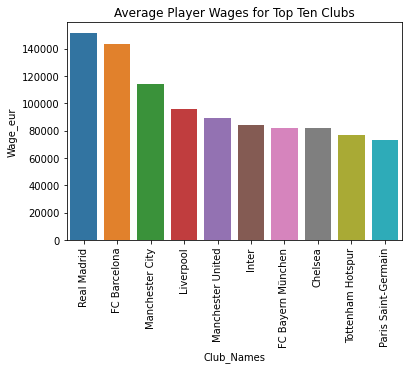

In [80]:
# Plotting the bar chart for the same
sns.barplot(top_10_avg_wage["club_name"],top_10_avg_wage["wage_eur"])
plt.xticks(rotation=90)
plt.ylabel("Wage_eur")
plt.xlabel("Club_Names")
plt.title("Average Player Wages for Top Ten Clubs")
plt.show()

#### Observation:

* From above table and graph we can observe that "Real Madrid" Club has the highest Wage of 155.5 thousand euros paid to the player on an average.

###  Getting an idea about the Clubs with the top players

In [81]:
# Grouping the Clubs and calculating the average Players Overall
club_avg_overall= pd.DataFrame(df.groupby("club_name")["overall"].mean())

club_avg_overall= club_avg_overall.sort_values(by="overall",ascending= False)
club_avg_overall.reset_index(inplace= True)

In [82]:
top_10_avg_overall= club_avg_overall[0:10]
top_10_avg_overall

,club_name,overall
0,FC Bayern München,81.045455
1,Real Madrid,79.250000
2,Chelsea,79.212121
3,FC Barcelona,78.909091
4,Liverpool,78.575758
5,Inter,78.000000
6,Manchester United,77.818182
7,Manchester City,77.484848
8,Juventus,77.483871
9,Tottenham Hotspur,77.242424


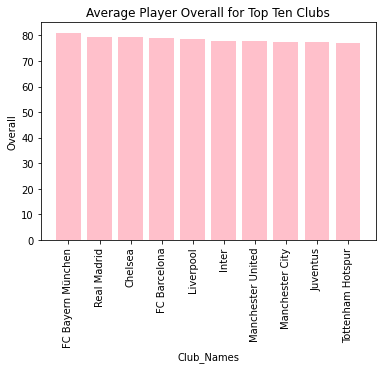

In [83]:
# Plotting the bar chart for the same
plt.bar(top_10_avg_overall["club_name"],top_10_avg_overall['overall'],color="pink")
plt.xticks(rotation=90)
plt.ylabel("Overall")
plt.xlabel("Club_Names")
plt.title("Average Player Overall for Top Ten Clubs")
plt.show()

### Countries with more leagues on FIFA 2021

In [84]:
max_players= pd.DataFrame(df.groupby("nationality")["long_name"].count())
max_players.reset_index(inplace= True)
max_players= max_players.rename({"long_name":"Count of Players","nationality":"Nationality"},axis=1)
max_players.sort_values(by="Count of Players",ascending= False)

,Nationality,Count of Players
47,England,1685
58,Germany,1189
140,Spain,1072
54,France,984
6,Argentina,936
...,...,...
130,Saint Lucia,1
118,Papua New Guinea,1
128,Rwanda,1
124,Puerto Rico,1


#### Observation:

* From above we can clearly conclude that The country with more leagues on FIFA 2021 is England asthey have the most number of players in the game.

### Count of Players having preferred_foot

In [85]:
df["preferred_foot"].value_counts()
# Most of the Players are Right Foot

Right    14448
Left      4496
Name: preferred_foot, dtype: int64

### The 4 major categories for Football would be :

* Attackers: ST, LW, RW, CF
* Midfielders: CAM, LM, CM, RM, CDM
* Defenders: LWB, RWB, LB, CB, RB
* Goalkeepers: GK

#### Defining a Function for bucketing the positions of the players in the respective categories mentioned above. 

* In case any player has more than 2 position, then with the help of the function we would be able to bucket the position of the player as per the maximum count of the repeated position.

* For instance Player 51 plays in 3 positions (CAM,CF,ST). CF & ST are categorised under Attackers whereas CAM as Midfielders. So Player 51 should be categorised as Attacker as it is repeated twice.

In [86]:
# Positions of Player 51: 
df["player_positions"][51]

'CAM, CF, ST'

In [88]:
def combine_positions(row):
    # There are 15 different positions
    positions = row['player_positions'].split(', ') 
    N = len(positions)
    if N < 3:
        # If a player has two positions the first one will be considered as their
        # position, of course, players with only one position won't be affected
        position = positions[0]
        if position in ['ST', 'LW', 'RW','CF']: #4
            return 0 #ATTACKER
        elif position in ['CAM', 'LM', 'CM', 'RM', 'CDM']: #5
            return 1 #MIDFIELDER
        elif position in ['LWB', 'RWB', 'LB', 'CB', 'RB']: #5
            return 2 #DEFENDER
        elif position in ['GK']: #1
            return 3 #GOALKEEPER
    else: # If player has three possible positions
        position_count = [0, 0, 0, 0] 
        for position in positions:
            if position in ['ST', 'LW', 'RW','CF']: #4
                index = 0 #ATTACKER
            elif position in ['CAM', 'LM', 'CM', 'RM', 'CDM']: #5
                index = 1 #MIDFIELDER
            elif position in ['LWB', 'RWB', 'LB', 'CB', 'RB']: #5
                index = 2 #DEFENDER
            elif position in ['GK']: #1
                index = 3 #GOALKEEPER
            else:
                continue 
            position_count[index] += 1 
        # This will count which was the most repeated position and assign it
        # to the player
        return position_count.index(max(position_count))

df['player_positions'] = df.apply(combine_positions, axis=1)

In [24]:
df['player_positions'][51]

# As explained above Player 51 is categorised under "Attackers"

0

In [25]:
df['player_positions'].value_counts()

# 0- Attackers
# 1- Midfielders
# 2- defender
# 3- Goalkeeper

1    7064
2    6154
0    3642
3    2084
Name: player_positions, dtype: int64

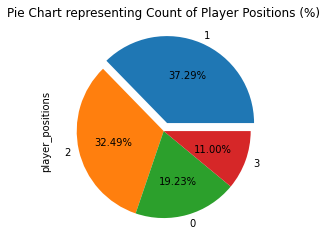

In [26]:
df['player_positions'].value_counts().plot(kind="pie",autopct='%1.2f%%',explode=[0.1,0,0,0])
plt.title("Pie Chart representing Count of Player Positions (%)")
plt.show()

#### Obsrvation:

* From above pie chart we can conclude that there are more midfielders and defenders than attackers and goalkeepers.
* The percentage count for Midfielders are 37.29%
* The percentage count for defenders are 32.49%

### Dropping all the columns, which wont be required for model building:

In [27]:
df_final= df[['skill_moves', 'player_positions', 'attacking_crossing', 'attacking_finishing',
         'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys',
         'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
         'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 
         'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power',
         'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
         'mentality_aggression', 'mentality_interceptions', 'mentality_positioning',
         'mentality_vision', 'mentality_penalties', 'mentality_composure',
         'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle',
         'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
         'goalkeeping_positioning', 'goalkeeping_reflexes']]

df_final.shape

# Only 36 columns out of 106 would be required for further analysis

(18944, 36)

In [38]:
### Missing Value Treatment:
df_final.isnull().sum()


skill_moves                       0
player_positions                  0
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control                0
movement_acceleration             0
movement_sprint_speed             0
movement_agility                  0
movement_reactions                0
movement_balance                  0
power_shot_power                  0
power_jumping                     0
power_stamina                     0
power_strength                    0
power_long_shots                  0
mentality_aggression              0
mentality_interceptions           0
mentality_positioning             0
mentality_vision                  0
mentality_penalties               0
mentality_composure         

####  We can observe that defending_marking feature is totally blank. Thus dropping that particular feature

In [29]:
df_final= df_final.drop("defending_marking",axis=1)

In [30]:
df_final.shape
# Total Columns after dropping defending_marking are 35

(18944, 35)

In [31]:
# Storing Independent and Target Variable in X and Y respectively
X= df_final.drop("player_positions",axis=1)
Y= df_final["player_positions"]

### Train- Test Split

In [32]:
from sklearn.model_selection import train_test_split
# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=20)
print("Shape of Xtrain:",x_train.shape)
print("Shape of Ytrain:",y_train.shape)
print("Shape of Xtest:",x_test.shape)
print("Shape of Ytest:",y_test.shape)

Shape of Xtrain: (13260, 34)
Shape of Ytrain: (13260,)
Shape of Xtest: (5684, 34)
Shape of Ytest: (5684,)


In [33]:
pd.DataFrame(y_train)["player_positions"].value_counts()

1    4970
2    4330
0    2500
3    1460
Name: player_positions, dtype: int64

### Balancing Dataset : SMOTE

* SMOTE creates synthetic observations of the minority class by:
  - Finding the k-nearest-neighbors for minority class observations (finding similar observations)
  - Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

In [34]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12,sampling_strategy="minority" )
x_train_bal, y_train_bal = sm.fit_sample(x_train, y_train)

In [35]:
pd.DataFrame(y_train_bal)[0].value_counts()

# We can observe that the minority class 3 have been oversanpled from 1460 to 4970.

3    4970
1    4970
2    4330
0    2500
Name: 0, dtype: int64

# Model Building

#### Logistic Regression 

In [36]:
# Building LR MOdel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer

pipe_lr = Pipeline([
    ("pt", PowerTransformer()),
    ('sc', StandardScaler()),
    ('LR', LogisticRegression())
    ])
pipe_lr.fit(x_train_bal,y_train_bal)
print("Testing Accuracy")
print(pipe_lr.score(x_test,y_test))
print("Training Accuracy")
print(pipe_lr.score(x_train_bal,y_train_bal))

Testing Accuracy
0.8800140745953554
Training Accuracy
0.9103160405485987


In [37]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [92]:
predicted= pipe_lr.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,f1_score
LR_F1= f1_score(y_test,predicted,average="weighted")
LR_precision= precision_score(y_test,predicted,average="weighted")
LR_recall= recall_score(y_test,predicted,average="weighted")
LR_accuracy= accuracy_score(y_test,predicted)
print('F1: ', LR_F1)
print('Precision:',LR_precision) 
print('Recall:', LR_recall)
print('Accuracy:', LR_accuracy)
print('\nConfusion Matrix:\n', confusion_matrix(y_test,predicted))

print( classification_report(y_test,predicted))


F1:  0.8795503621249723
Precision: 0.879999802670087
Recall: 0.8800140745953554
Accuracy: 0.8800140745953554

Confusion Matrix:
 [[ 881  256    5    0]
 [ 161 1795  138    0]
 [   0  122 1702    0]
 [   0    0    0  624]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1142
           1       0.83      0.86      0.84      2094
           2       0.92      0.93      0.93      1824
           3       1.00      1.00      1.00       624

    accuracy                           0.88      5684
   macro avg       0.90      0.89      0.89      5684
weighted avg       0.88      0.88      0.88      5684



#### Observation: 
* From above base model we can observe that the model is able to predict 88% of the results correctly

###  Plotting a Confusion Matrix

* A useful tool to visualize the performance of an algorithm is the confusion matrix. This two dimension table shows the labeling of the players. The normalized shows the classification as percentage and the unnormalized as number of players.

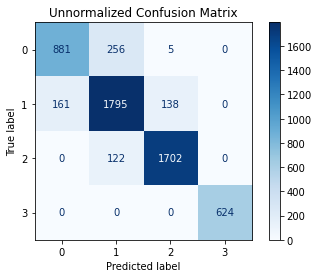

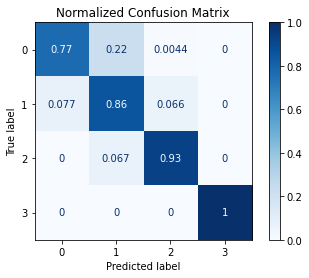

In [39]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Unnormalized Confusion Matrix", None),
                  ("Normalized Confusion Matrix", 'true')]
class_names = [0,1,2,3]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(pipe_lr, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

#### Observation:

* As mentioned obove also the groups are classified as:
      -- Class 0 for Attackers
      -- Class 1 for Midfielders
      -- Class 2 for Defenders
      -- Class 3 for Goalkeepers

* From above plot we can clearly observe:
     - 881 (77%) Attackers were correctly classified.
     - 256 (22%) Attackers were classified as Midfielders.
     - 5 (0.4%) Attackers were classified as Defenders.
     - 0(0%) Attackers were classified as Goalkeepers.
     
     
* And so on for each position we can conclude. Also it can be clearly concluded that out of all the 4 classes Goalkeeper position have benn 100% correctly classified. 
     

### K-Fold Cross Validation

* Checking different models with different scoring_metrix using K-Fold Cross Validation

In [40]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

### Concatenating the Balanced Training Dataset with the original Testing Dataset for K-Fold Cross Validation

In [41]:
# Converting the xtrain into a data Frame
xtrain_bal_df= pd.DataFrame(x_train_bal)
xtrain_bal_df.columns= X.columns

In [ ]:
# Converting the ytrain into a data Frame
ytrain_bal_df= pd.DataFrame(y_train_bal)
ytrain_bal_df.rename({0:"player_positions"},axis=1,inplace= True)

In [ ]:
# Merging xtrain with ytrain on basis of same index. 
Train_df= pd.merge(xtrain_bal_df, ytrain_bal_df, left_index=True, right_index=True)
Train_df.reset_index(drop=True,inplace= True)
# Merging xtest with ytest on basis of same index.
Test_df= pd.merge(x_test, y_test, left_index=True, right_index=True)
Test_df.reset_index(drop=True,inplace= True)

In [ ]:
# Concatenating the Train and Testing DF
df_bal= pd.concat([Train_df,Test_df],axis=0)

# Splitting the Target and Independent Features in oup and inp  variables respectively
inp= df_bal.drop("player_positions",axis=1)  
oup= df_bal["player_positions"]    

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold



In [63]:
clf1= LogisticRegression()
clf2= DecisionTreeClassifier(random_state=20)
clf3= RandomForestClassifier(random_state=20)
clf4= KNeighborsClassifier() 
clf5= XGBClassifier(random_state=20)
clf6= GradientBoostingClassifier(random_state=20)

In [51]:
# As per the size of dataset considering n_splits as 10
kf=KFold(n_splits=10,shuffle=True,random_state=20)


In [64]:
# Scoring Metric: Accuracy
for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6],['LR','DT','RF','KNN',"XGB",'GB']):
    score = cross_val_score(i, inp, oup, cv=kf, scoring='accuracy')
    print(j,np.mean(score),np.std(score)/np.mean(score))

LR 0.9013094102457823 0.007690467136967012
DT 0.8528547658098435 0.005829210758236549
RF 0.9060296255456372 0.0068086652853392
KNN 0.8926697499340573 0.005490195140012162
XGB 0.9077222163827006 0.006921099116848896
GB 0.9064304569172219 0.007183826492344293


In [53]:
from sklearn.metrics import f1_score,make_scorer
scorer = make_scorer(f1_score, average = 'weighted')

In [65]:
# Scoring Metric: F-1 Score

for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6],['LR','DT','RF','KNN',"XGB",'GB']):
    score = cross_val_score(i, inp, oup, cv=kf, scoring= scorer)
    print(j,np.mean(score),np.std(score)/np.mean(score))

LR 0.9010739873988791 0.007660574814684471
DT 0.8528823640827057 0.006223116555380685
RF 0.905494032455743 0.006930953373536354
KNN 0.8926689455617435 0.005596180640288559
XGB 0.90724006397335 0.006988323300299998
GB 0.9060362983845269 0.007256156782794013


#### Conclusion:

* From above, we can conclude that XGB with both f1 and accuracy score is giving best BA and VE Trade off.
* Thus selecting XGB for further evaluation. 

### Parameter tuning for the selected model- XGB Claasifier

* Will be choosing 3 main parameters for XGB CLassifier mentioned below:
    - N_estimators: The number of trees (or rounds)
    - Learning_rate: Longest path between the root node and the leaf node
    - max_depth: Shrinkage done at every step which are made. Therefore, to get the most of xgboost, the learning rate (eta) must be set as low as possible

In [66]:
# Parameter Tuning for N_estimators:
ba=[]
ve=[]
kf=KFold(n_splits=10,shuffle=True,random_state=20)
for i in [5,10,20,40,60,80,100,120,150,200,250,300,400]:
    
    XGB=XGBClassifier(n_estimators=i,random_state=20)
    score=cross_val_score(XGB,inp,oup,cv=kf,scoring= "accuracy")
    print('n_estimator:',i)
    print('Bias Accuracy',np.mean(score))
    print('Variance Error',np.std(score)/np.mean(score))
    ba.append(np.mean(score))
    ve.append(np.std(score)/np.mean(score))

n_estimator: 5
Bias Accuracy 0.8957868777356233
Variance Error 0.007455650806802371
n_estimator: 10
Bias Accuracy 0.9021108944979146
Variance Error 0.007346667710014631
n_estimator: 20
Bias Accuracy 0.9067423600878174
Variance Error 0.005756262602327398
n_estimator: 40
Bias Accuracy 0.9074102933797675
Variance Error 0.005224080123234608
n_estimator: 60
Bias Accuracy 0.9083009636532751
Variance Error 0.0059551576653061105
n_estimator: 80
Bias Accuracy 0.9070096999962318
Variance Error 0.00559729252077399
n_estimator: 100
Bias Accuracy 0.9077222163827006
Variance Error 0.006921099116848896
n_estimator: 120
Bias Accuracy 0.9069206924658934
Variance Error 0.0069607772562385525
n_estimator: 150
Bias Accuracy 0.9068314469475058
Variance Error 0.006966933292485642
n_estimator: 200
Bias Accuracy 0.9080341988826464
Variance Error 0.006515243854796966
n_estimator: 250
Bias Accuracy 0.9081677300104914
Variance Error 0.0071711282751293765
n_estimator: 300
Bias Accuracy 0.9073216824961774
Variance 

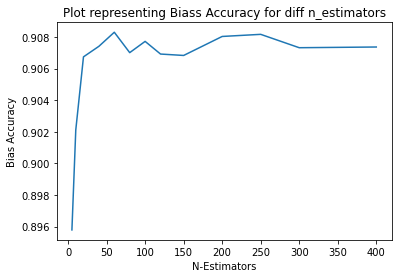

In [70]:
from matplotlib import pyplot as plt
plt.plot([5,10,20,40,60,80,100,120,150,200,250,300,400],ba)
plt.xlabel("N-Estimators")
plt.ylabel("Bias Accuracy")
plt.title("Plot representing Biass Accuracy for diff n_estimators")
plt.show()

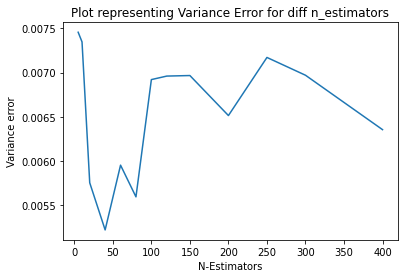

In [72]:
plt.plot([5,10,20,40,60,80,100,120,150,200,250,300,400],ve)
plt.xlabel("N-Estimators")
plt.ylabel("Variance error")
plt.title("Plot representing Variance Error for diff n_estimators")
plt.show()

#### Conclusion:

* N_estimator at 40 gives the best trade off between BA and VE, thus will be selecting the n_estimator as 40 for building XGB Classifier

In [76]:
# Parameter Tuning for Learning Rate and Max_depth:
ba1=[]
ve1=[]
ba2=[]
ve2=[]
kf=KFold(n_splits=10,shuffle=True,random_state=20)
for i in [10,15,20,25,30,35]:
        XGB=XGBClassifier(max_depth=i,random_state=20)
        score=cross_val_score(XGB,inp,oup,cv=kf,scoring= "accuracy")
        print('max_depth:',i)
        print('Bias Accuracy',np.mean(score))
        print('Variance Error',np.std(score)/np.mean(score))
        ba1.append(np.mean(score))
        ve1.append(np.std(score)/np.mean(score))
print()       
for j in[0.01,0.1,1,10,100]:
    XGB1=XGBClassifier(learning_rate=j,random_state=20)
    score1=cross_val_score(XGB1,inp,oup,cv=kf,scoring= "accuracy")
    print('LR:',j)
    print('Bias Accuracy',np.mean(score1))
    print('Variance Error',np.std(score1)/np.mean(score1))
    ba2.append(np.mean(score1))
    ve2.append(np.std(score1)/np.mean(score1))

max_depth: 10
Bias Accuracy 0.9075442013220236
Variance Error 0.005265795009943195
max_depth: 15
Bias Accuracy 0.9083458838975303
Variance Error 0.005693593102079825
max_depth: 20
Bias Accuracy 0.9087467351014524
Variance Error 0.005988987156825051
max_depth: 25
Bias Accuracy 0.908078543989116
Variance Error 0.005914412059157121
max_depth: 30
Bias Accuracy 0.9071432509564146
Variance Error 0.006574085989692902
max_depth: 35
Bias Accuracy 0.9080785241567787
Variance Error 0.00528811617284363

LR: 0.01
Bias Accuracy 0.8936494872349161
Variance Error 0.008795524879173464
LR: 0.1
Bias Accuracy 0.90954817968891
Variance Error 0.005696114682813859
LR: 1
Bias Accuracy 0.9025560908083066
Variance Error 0.006418386624629131
LR: 10
Bias Accuracy 0.565110614861957
Variance Error 0.3100895289937421
LR: 100
Bias Accuracy 0.25234227837858747
Variance Error 0.17137415405015222


### Plotting Graph for BA and VE at different max_depth

In [77]:
ba_md=pd.DataFrame(ba1)/pd.DataFrame(ba1).sum()
ve_md=pd.DataFrame(ve1)/pd.DataFrame(ve1).sum()
# normalize the dataset

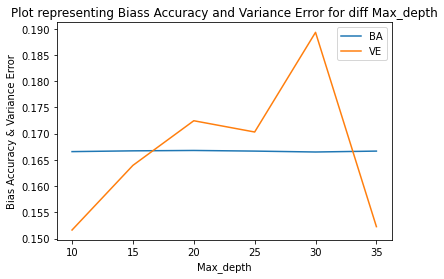

In [78]:
plt.plot([10,15,20,25,30,35],ba_md,label="BA")
plt.plot([10,15,20,25,30,35],ve_md,label="VE")
plt.legend()
plt.xlabel("Max_depth")
plt.ylabel("Bias Accuracy & Variance Error")
plt.title("Plot representing Biass Accuracy and Variance Error for diff Max_depth")
plt.show()


### Plotting Graph for BA and VE at different learning_rate

In [79]:
ba_lr=pd.DataFrame(ba2)/pd.DataFrame(ba2).sum()
ve_lr=pd.DataFrame(ve2)/pd.DataFrame(ve2).sum()
# normalize the dataset

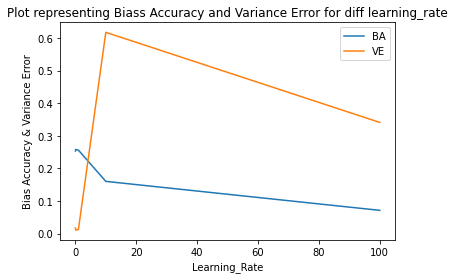

In [80]:
plt.plot([0.01,0.1,1,10,100],ba_lr,label="BA")
plt.plot([0.01,0.1,1,10,100],ve_lr,label="VE")
plt.legend()
plt.xlabel("Learning_Rate")
plt.ylabel("Bias Accuracy & Variance Error")
plt.title("Plot representing Biass Accuracy and Variance Error for diff learning_rate")
plt.show()


#### Conclusion:

* Max_Depth at 35 and Learning_Rate at 0.1 gives the best trade off between BA and VE, thus will be selecting the Max_Depth as 35 and Learning_Rate at 0.1 for building XGB Classifier

### Building The Final Model with tuned Parameter

In [81]:
final_mod=XGBClassifier(max_depth=35,n_estimators= 40,learning_rate=0.1,random_state=20 )

In [ ]:
# Scaling the data and applying Power Transformation to deal with skewness
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer


In [82]:
from sklearn.model_selection import train_test_split
# setting up testing and training sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(inp, oup, test_size=0.30, random_state=20)
print("Shape of Xtrain:",Xtrain.shape)
print("Shape of Ytrain:",Ytrain.shape)
print("Shape of Xtest:",Xtest.shape)
print("Shape of Ytest:",Ytest.shape)

Shape of Xtrain: (15717, 34)
Shape of Ytrain: (15717,)
Shape of Xtest: (6737, 34)
Shape of Ytest: (6737,)


In [83]:
pt = PowerTransformer()
powerxtrain = pt.fit_transform(Xtrain)
powerxtest = pt.transform(Xtest)
sc=StandardScaler()
scaledxtrain = sc.fit_transform(powerxtrain)
scaledxtest = sc.transform(powerxtest)

In [84]:
final_mod.fit(scaledxtrain,Ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=35,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=40, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=20, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
ypred=final_mod.predict(scaledxtest)


In [91]:
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,f1_score,accuracy_score
XGB_F1= f1_score(Ytest,ypred,average="weighted")
XGB_precision= precision_score(Ytest,ypred,average="weighted")
XGB_recall= recall_score(Ytest,ypred,average="weighted")
XGB_accuracy= accuracy_score(Ytest,ypred)
print('F1: ', XGB_F1)
print('Precision:',XGB_precision) 
print('Recall:', XGB_recall)
print('Accuracy:', XGB_accuracy)
print('\nConfusion Matrix:\n', confusion_matrix(Ytest,ypred))

print('class_report:', classification_report(Ytest,ypred))

F1:  0.9056826828954154
Precision: 0.9059062414372843
Recall: 0.9060412646578596
Accuracy: 0.9060412646578596

Confusion Matrix:
 [[ 865  234    6    0]
 [ 153 1798  127    0]
 [   1  112 1719    0]
 [   0    0    0 1722]]
class_report:               precision    recall  f1-score   support

           0       0.85      0.78      0.81      1105
           1       0.84      0.87      0.85      2078
           2       0.93      0.94      0.93      1832
           3       1.00      1.00      1.00      1722

    accuracy                           0.91      6737
   macro avg       0.90      0.90      0.90      6737
weighted avg       0.91      0.91      0.91      6737



In [106]:
final_mod.score(scaledxtrain,Ytrain)

0.9997454985048038

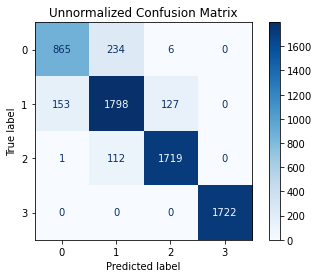

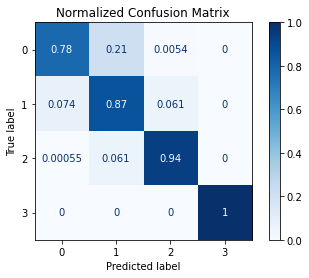

In [88]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Unnormalized Confusion Matrix", None),
                  ("Normalized Confusion Matrix", 'true')]
class_names = [0,1,2,3]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(final_mod, scaledxtest, Ytest,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

### Final Results Comparision

In [93]:
result = {'Logistic Regression':(LR_F1,LR_precision,LR_recall,LR_accuracy),'XGB Classifier':(XGB_F1,XGB_precision,XGB_recall,XGB_accuracy)}

col = ('Weighted_Recall','Weighted_Precision',"Weighted_F-1","Accuracy")

r = pd.DataFrame(result,index=col)
r

,Logistic Regression,XGB Classifier
Weighted_Recall,0.879550,0.905683
Weighted_Precision,0.880000,0.905906
Weighted_F-1,0.880014,0.906041
Accuracy,0.880014,0.906041


#### Conclusion:

* From the above table we can observe that XGB Classifier is giving better results than base model which was built in starting using Logistic Regression

## PCA

In [ ]:
## Checking the multicolinearity b/w the independent features using heatmap

<AxesSubplot:>

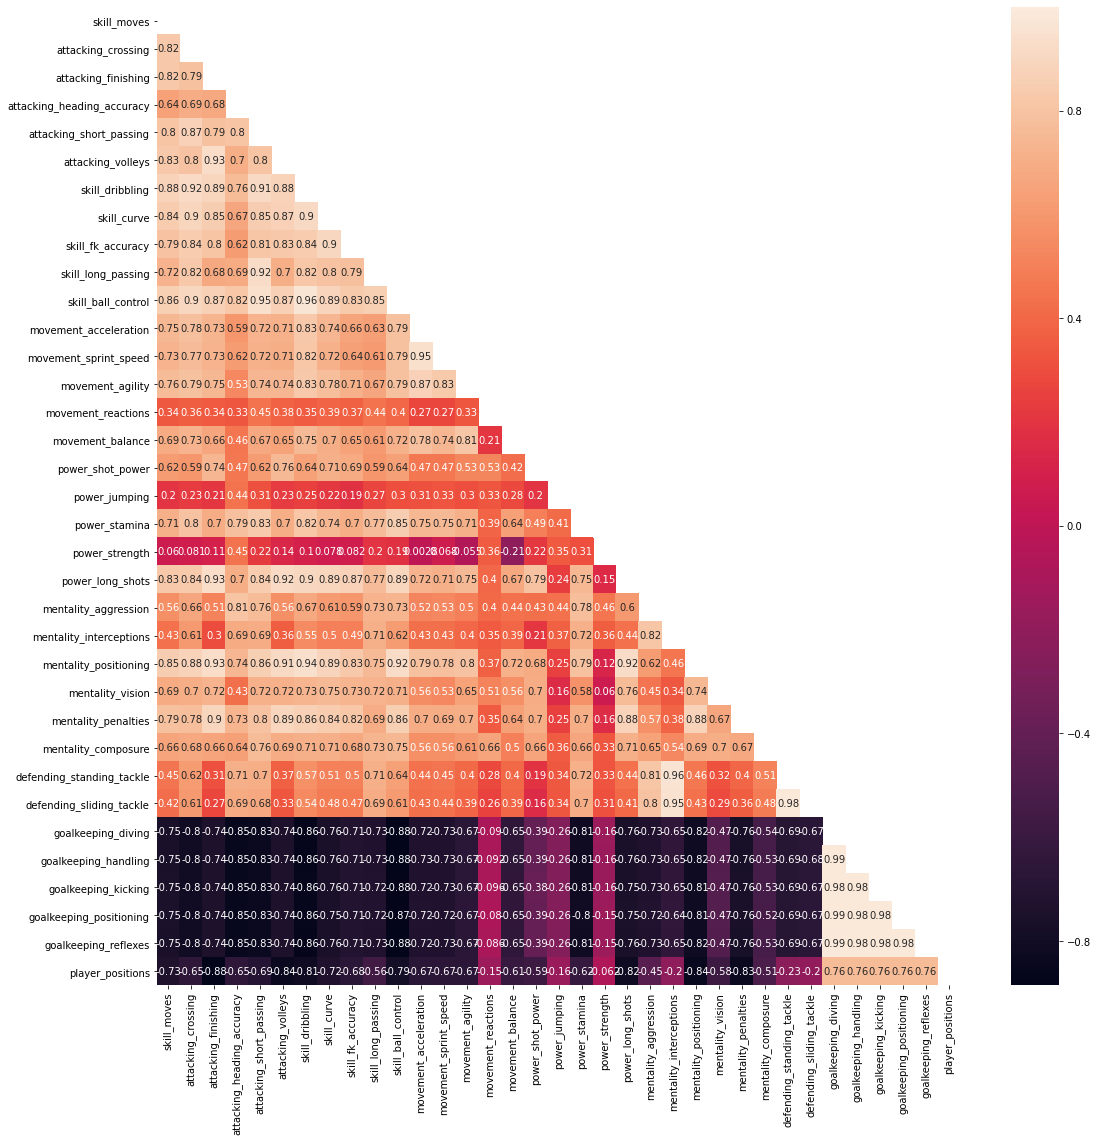

In [94]:
matrix = np.triu(df_bal.corr())
plt.figure(figsize=[18,18])
sns.heatmap(df_bal.corr(),annot= True,mask=matrix)

<AxesSubplot:>

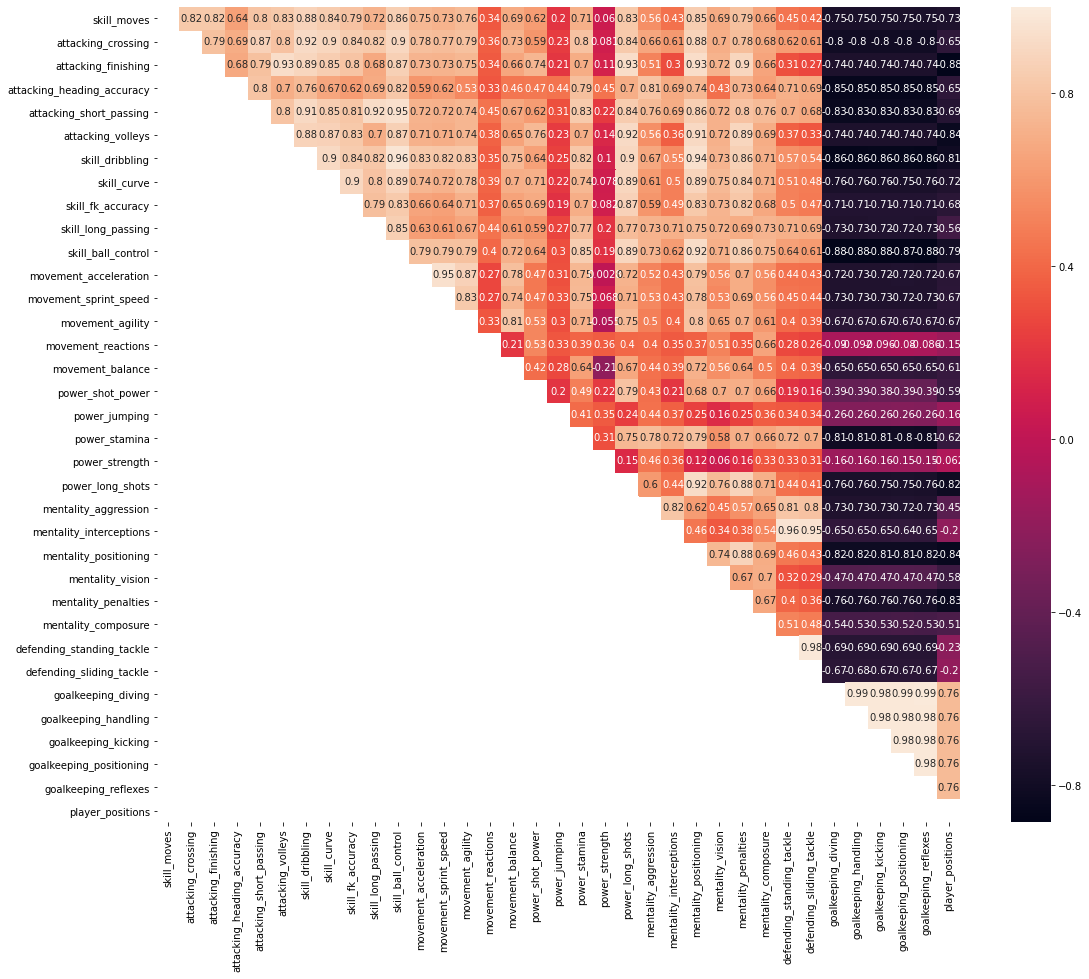

In [95]:
mask = np.tril(df_bal.corr())
plt.figure(figsize=[18,15])
sns.heatmap(df_bal.corr(), annot=True, mask=mask)

In [ ]:
# From above heatmap we can clearly observe that there is high multicolinearity b/w independent features

### Applying PCA

In [97]:
from sklearn.decomposition import PCA

In [104]:
for i in range(1,35):
    pca= PCA(n_components=i)
    pca_xtrain= pca.fit_transform(scaledxtrain)
    pca_xtest= pca.transform(scaledxtest)
    
    pca_mod= XGBClassifier(random_state=20 )
    pca_mod.fit(pca_xtrain,Ytrain)
    pca_mod.predict(scaledxtest)
    
    
    
    print("\n Number of PCA Components:",i)
    print("Training Accuracy:",pca_mod.score(pca_xtrain,Ytrain))
    print("Testing Accuracy:",pca_mod.score(pca_xtest,Ytest)
  


 Number of PCA Components: 1
Training Accuracy: 0.6861996564229815
Testing Accuracy: 0.6292118153480778

 Number of PCA Components: 2
Training Accuracy: 0.8485716103582108
Testing Accuracy: 0.7285141754490129

 Number of PCA Components: 3
Training Accuracy: 0.8976267735572947
Testing Accuracy: 0.7914502003859285

 Number of PCA Components: 4
Training Accuracy: 0.9252401857860915
Testing Accuracy: 0.8300430458661125

 Number of PCA Components: 5
Training Accuracy: 0.9492269517083413
Testing Accuracy: 0.8436989758052545

 Number of PCA Components: 6
Training Accuracy: 0.9594070115161927
Testing Accuracy: 0.8549799614071545

 Number of PCA Components: 7
Training Accuracy: 0.970477826557231
Testing Accuracy: 0.8563158675968532

 Number of PCA Components: 8
Training Accuracy: 0.9765222370681428
Testing Accuracy: 0.8684874573252189

 Number of PCA Components: 9
Training Accuracy: 0.9804670102436852
Testing Accuracy: 0.8727920439364703

 Number of PCA Components: 10
Training Accuracy: 0.9861

In [117]:
pca= PCA(n_components=27)
pca_xtrain= pca.fit_transform(scaledxtrain)
pca_xtest= pca.transform(scaledxtest)

In [119]:
np.sum(pca.explained_variance_ratio_)

0.9937014570148063

<AxesSubplot:>

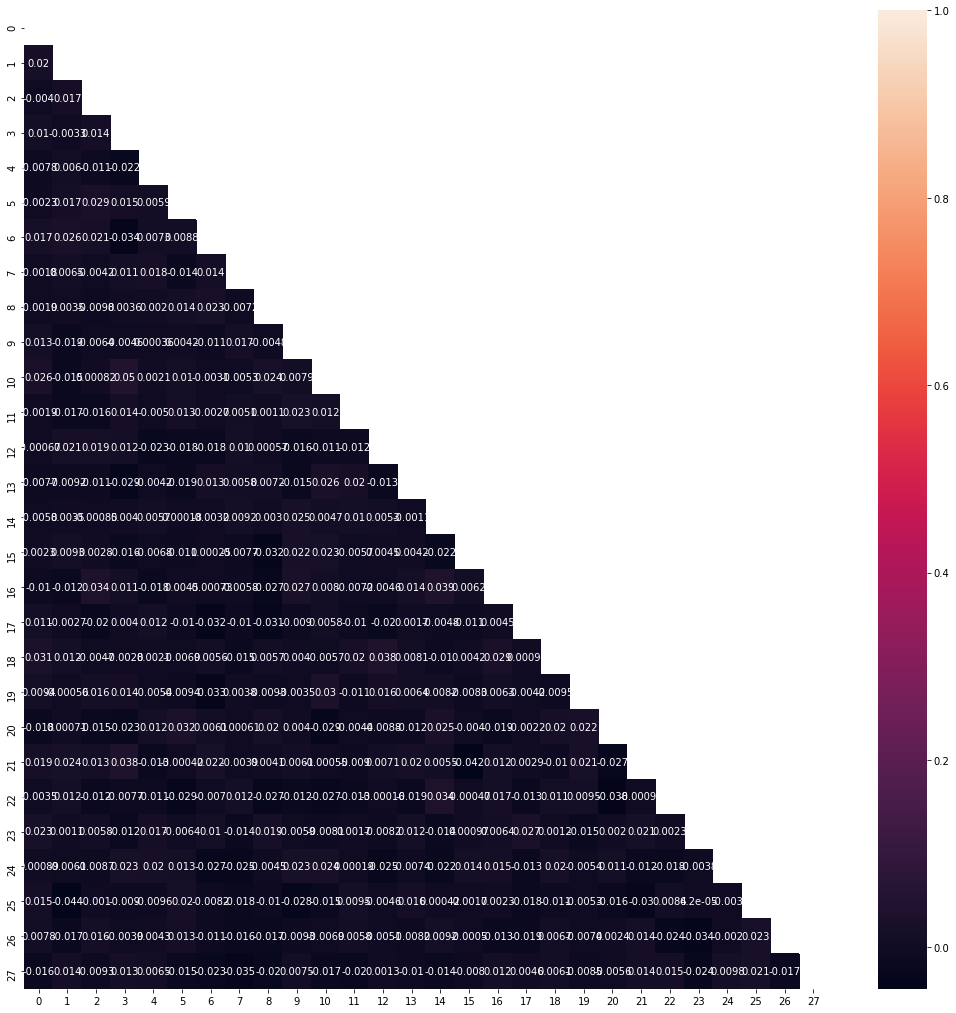

In [128]:
matrix = np.triu(pd.DataFrame(pca_xtest).corr())
plt.figure(figsize=[18,18])
sns.heatmap(pd.DataFrame(pca_xtest).corr(),annot= True,mask=matrix)

#### Conclusion:

* After applying PCA we can observe that with just 27 PCA Components we were able to get 99.9% of Training Accuracy and 90.1% of Testing Accuracy

* PCA also helped to reduce the multicolinearity which was present b/w the independent features